## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import pickle
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.utils import plot_model

## Reading the resized images

In [2]:
file = open('img_x_train.pkl','rb')
resized_img_Xtrain = pickle.load(file)
file.close()

file = open('img_y_train.pkl','rb')
resized_img_Ytrain = pickle.load(file)
file.close()

file = open('img_x_test.pkl','rb')
resized_img_Xtest = pickle.load(file)
file.close()

file = open('img_y_test.pkl','rb')
resized_img_Ytest = pickle.load(file)
file.close()

file = open('img_x_val.pkl','rb')
resized_img_Xval = pickle.load(file)
file.close()

file = open('img_y_val.pkl','rb')
resized_img_Yval = pickle.load(file)
file.close()

## Normalizing the images

In [3]:
# We are normalizing the images to get pixels values between 0-1.

train_x = np.array(resized_img_Ytrain[0:20000])
train_x = train_x/255.0

test_x = np.array(resized_img_Ytest[0:2001])
test_x = test_x/255.0

val_x = np.array(resized_img_Yval[0:2001])
val_x = val_x/255.0

train_x_px = np.array(resized_img_Xtrain[0:20000])
train_x_px = train_x_px/255.0

test_x_px = np.array(resized_img_Xtest[0:2001])
test_x_px = test_x_px/255.0

val_x_px = np.array(resized_img_Xval[0:2001])
val_x_px = val_x_px/255.0

## Autoencoder - Fully connected 1 Low risk

In [ ]:
# Autoencoder - It consists of two sequential models - encoder and decoder. 
# This is a fully connected autoencoder in which both the sub-models will have dense layers.
# In the encoder we first flatten our image which is of size (80*80*3) 
# Flattened output is then fed to the dense layer
# The width of each dense layer is gradually decreased
# All the dense layers have ReLu activation 
# Except the last one in which we have used Sigmoid because we needed the output pixel values to be between 0 and 1
# At last the output layer is the Reshape layer to get the reconstructed image
encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3])) # Dense layer takes a flattened input
encoder.add(Dense(9600,activation="relu")) 
encoder.add(Dense(4800,activation="relu"))  
encoder.add(Dense(2400,activation="relu"))
encoder.add(Dense(1200,activation="relu"))
encoder.add(Dense(600,activation="relu"))

# The output of Encoder is the input for Decoder

decoder = Sequential()

decoder.add(Dense(1200,input_shape=[600],activation='relu'))
decoder.add(Dense(2400,activation='relu'))
decoder.add(Dense(4800,activation='relu'))
decoder.add(Dense(9600,activation='relu'))
decoder.add(Dense(80*80*3,activation='sigmoid',input_shape = [9600]))
decoder.add(Reshape([80,80,3]))


full_autoencoder = Sequential([encoder,decoder])

# We are compiling the model using Adam optimizer and by minimizing the MSE.

full_autoencoder.compile(optimizer='adam', loss='mse')


<h2>Encoder Architecture <h2><img src="model_encoder_deep.png" alt="Alternative text" />

<h2>Encoder Architecture <h2><img src="model_decoder_deep.png" alt="Alternative text" />

In [ ]:
# While training the model we are using EarlyStopping to prevent overfitting.
# We are monitoring the Validation Loss 
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

full_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

In [9]:
full_autoencoder = load_model('simple_autoencoder.h5')

In [10]:
predictions = full_autoencoder.predict(test_x_px)

 1/63 [..............................] - ETA: 16s

2023-02-06 19:45:46.190802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 10s 163ms/step


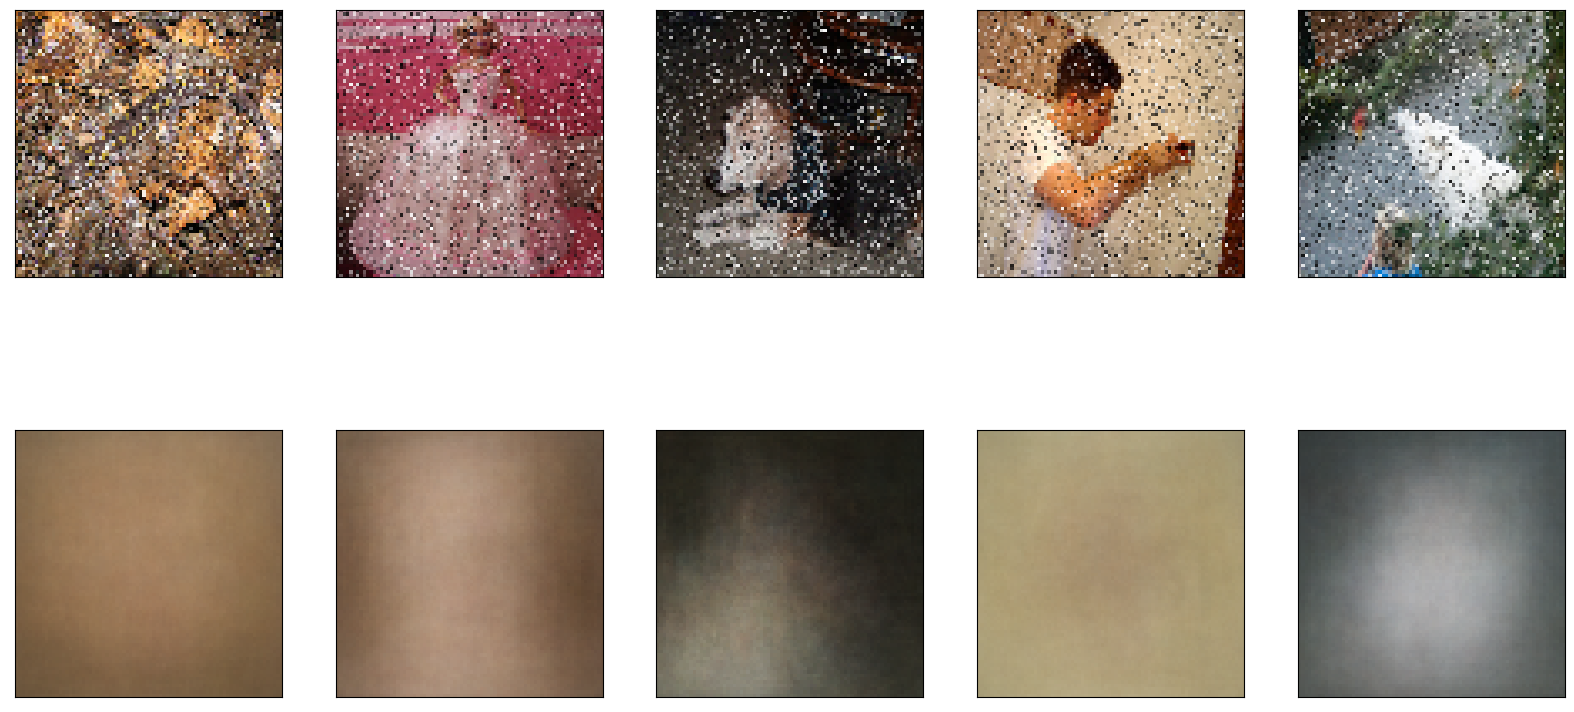

In [11]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## Autoencoder - Fully connected 2 Low risk

In [ ]:
# This Autoencoder follows a similar structure.
# The difference is that this model is not as deep as the previous one.

encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3]))
encoder.add(Dense(9600,activation="relu"))



decoder = Sequential()

decoder.add(Dense(80*80*3,input_shape=[9600],activation='sigmoid'))

decoder.add(Reshape([80,80,3]))

simple_autoencoder = Sequential([encoder,decoder])



<h2>Encoder Architecture <h2><img src="model_encoder.png" alt="Alternative text" />

<h2>Decoder Architecture <h2><img src="model_decoder.png" alt="Alternative text" />

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

simple_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

In [ ]:
simple_autoencoder.save('simple_auto_layer.h5')

In [12]:
simple_autoencoder = load_model('simple_auto_layer.h5')

In [13]:
predictions = simple_autoencoder.predict(test_x_px)

 1/63 [..............................] - ETA: 10s

2023-02-06 19:46:12.109239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 4s 61ms/step


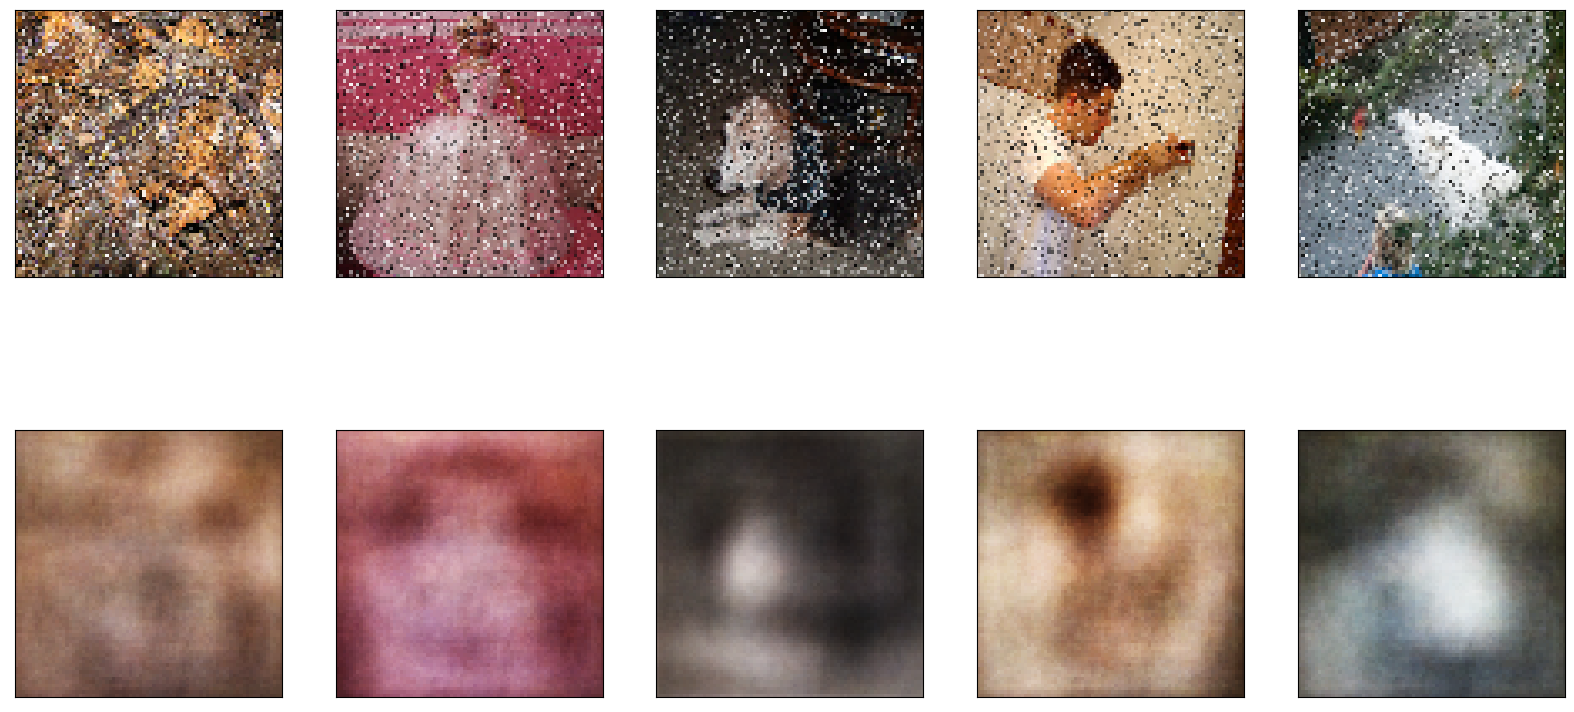

In [14]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()